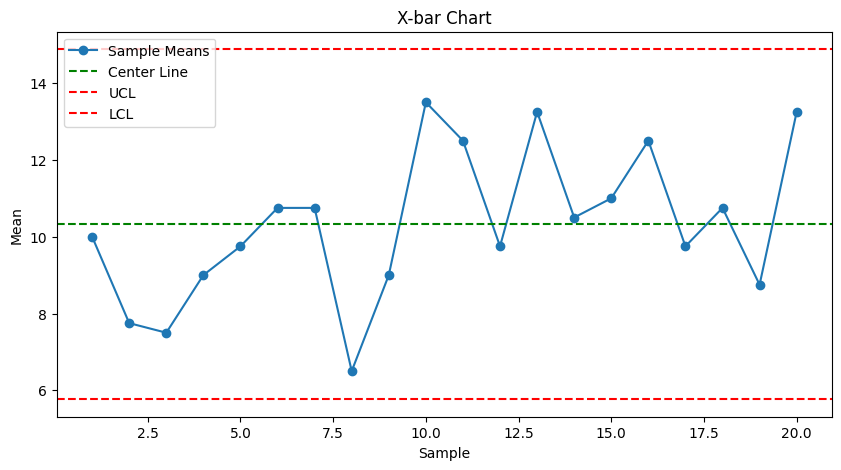

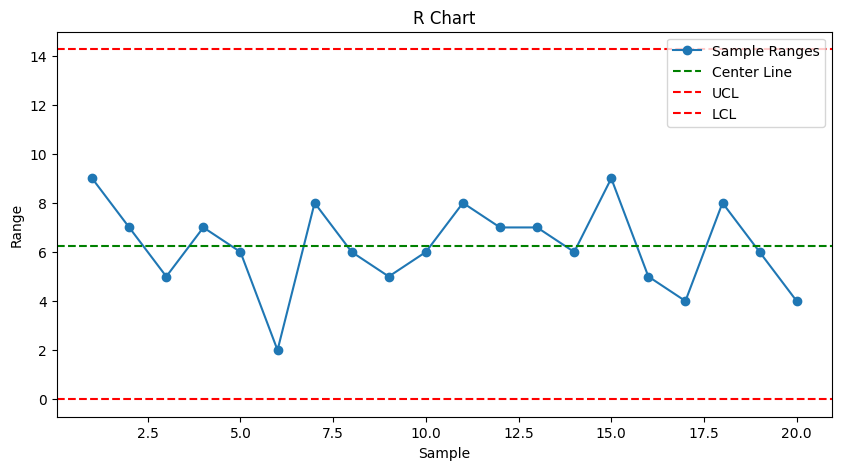

Process Capability Index (Cp): 5.49
The process is capable of meeting specifications.
Shapiro-Wilk Test: Statistic=0.960, P-value=0.549
The sample means appear to be normally distributed.


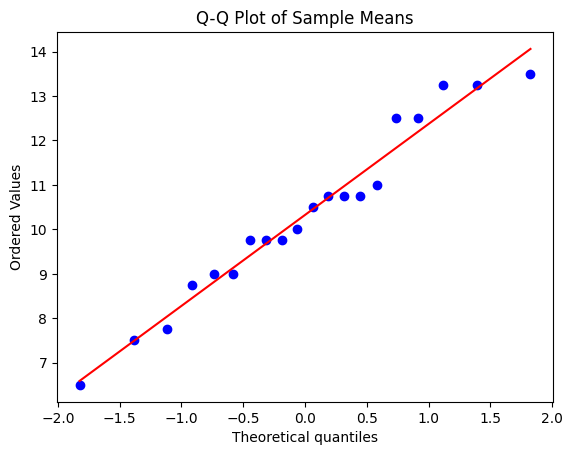

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot


data = pd.DataFrame({
    'Sample': range(1, 21),
    'x1': [6, 10, 7, 8, 9, 12, 16, 7, 9, 15, 8, 6, 16, 7, 11, 15, 9, 15, 8, 13],
    'x2': [9, 4, 8, 9, 10, 11, 10, 5, 7, 16, 12, 13, 9, 13, 7, 10, 8, 7, 6, 14],
    'x3': [10, 6, 10, 6, 7, 10, 8, 10, 8, 10, 14, 9, 13, 10, 10, 11, 12, 10, 9, 11],
    'x4': [15, 11, 5, 13, 13, 10, 9, 4, 12, 13, 16, 11, 15, 12, 16, 14, 10, 11, 12, 15]
})

# (a)
data['Mean'] = data[['x1', 'x2', 'x3', 'x4']].mean(axis=1)
data['Range'] = data[['x1', 'x2', 'x3', 'x4']].max(axis=1) - data[['x1', 'x2', 'x3', 'x4']].min(axis=1)

x_bar_bar = data['Mean'].mean()
r_bar = data['Range'].mean()


A2 = 0.729
D3 = 0
D4 = 2.282


UCL_xbar = x_bar_bar + A2 * r_bar
LCL_xbar = x_bar_bar - A2 * r_bar
UCL_r = D4 * r_bar
LCL_r = D3 * r_bar


plt.figure(figsize=(10, 5))
plt.plot(data['Sample'], data['Mean'], marker='o', label='Sample Means')
plt.axhline(x_bar_bar, color='green', linestyle='--', label='Center Line')
plt.axhline(UCL_xbar, color='red', linestyle='--', label='UCL')
plt.axhline(LCL_xbar, color='red', linestyle='--', label='LCL')
plt.title('X-bar Chart')
plt.xlabel('Sample')
plt.ylabel('Mean')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(data['Sample'], data['Range'], marker='o', label='Sample Ranges')
plt.axhline(r_bar, color='green', linestyle='--', label='Center Line')
plt.axhline(UCL_r, color='red', linestyle='--', label='UCL')
plt.axhline(LCL_r, color='red', linestyle='--', label='LCL')
plt.title('R Chart')
plt.xlabel('Sample')
plt.ylabel('Range')
plt.legend()
plt.show()

# (b)
specifications = [350 - 5, 350 + 5]  # Specifications in volts
transformed_specifications = [10 * (spec - 350) for spec in specifications]

process_std_dev = r_bar / 2.059  # Approximate estimate (d2 = 2.059 for n=4)
Cp = (transformed_specifications[1] - transformed_specifications[0]) / (6 * process_std_dev)

print(f"Process Capability Index (Cp): {Cp:.2f}")
if Cp >= 1:
    print("The process is capable of meeting specifications.")
else:
    print("The process is not capable of meeting specifications.")

# (c)
shapiro_stat, shapiro_p = shapiro(data['Mean'])
print(f"Shapiro-Wilk Test: Statistic={shapiro_stat:.3f}, P-value={shapiro_p:.3f}")
if shapiro_p > 0.05:
    print("The sample means appear to be normally distributed.")
else:
    print("The sample means do not appear to be normally distributed.")


probplot(data['Mean'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Sample Means")
plt.show()


In [5]:
import numpy as np
from scipy.stats import norm


n = 7
num_samples = 35
sum_xbar = 7805
sum_r = 1200
LSL, USL = 220 - 35, 220 + 35  # Specification limits

# (a)
x_bar_bar = sum_xbar / num_samples
R_bar = sum_r / num_samples


A2 = 0.419
D3 = 0.076
D4 = 1.924
d2 = 2.704


UCL_xbar = x_bar_bar + A2 * R_bar
LCL_xbar = x_bar_bar - A2 * R_bar


UCL_R = D4 * R_bar
LCL_R = D3 * R_bar

print("X-bar Chart:")
print(f"Center Line: {x_bar_bar:.2f}, UCL: {UCL_xbar:.2f}, LCL: {LCL_xbar:.2f}")
print("R Chart:")
print(f"Center Line: {R_bar:.2f}, UCL: {UCL_R:.2f}, LCL: {LCL_R:.2f}")

# (b)
process_mean = x_bar_bar
process_std_dev = R_bar / d2
print(f"\nProcess Mean (Estimated): {process_mean:.2f}")
print(f"Process Standard Deviation (Estimated): {process_std_dev:.2f}")

# (c)
Cp = (USL - LSL) / (6 * process_std_dev)
Cpk = min((USL - process_mean), (process_mean - LSL)) / (3 * process_std_dev)

#
z_LSL = (LSL - process_mean) / process_std_dev
z_USL = (USL - process_mean) / process_std_dev
frac_nonconforming = norm.cdf(z_LSL) + (1 - norm.cdf(z_USL))

print(f"\nProcess Capability Index (Cp): {Cp:.2f}")
print(f"Process Capability Index (Cpk): {Cpk:.2f}")
print(f"Fraction Nonconforming: {frac_nonconforming:.4f}")

# (d)
optimal_mean = (USL + LSL) / 2  # Midpoint of specifications
frac_nonconforming_optimal = 2 * (1 - norm.cdf((USL - optimal_mean) / process_std_dev))

print(f"\nOptimal Process Mean: {optimal_mean:.2f}")
print(f"Fraction Nonconforming at Optimal Mean: {frac_nonconforming_optimal:.4f}")


X-bar Chart:
Center Line: 223.00, UCL: 237.37, LCL: 208.63
R Chart:
Center Line: 34.29, UCL: 65.97, LCL: 2.61

Process Mean (Estimated): 223.00
Process Standard Deviation (Estimated): 12.68

Process Capability Index (Cp): 0.92
Process Capability Index (Cpk): 0.84
Fraction Nonconforming: 0.0072

Optimal Process Mean: 220.00
Fraction Nonconforming at Optimal Mean: 0.0058
